# Automation report tool

For this tool, you'll need the import related colections installed and you need to follow the format of the sample CSV, otherwise you'll need to do some code changes in the notebook file. Use excel to edit it more easily. For better usage of this tool follow the pattern. 
Automation status: Automated, RTA(Ready to automate), DNA(Do not automate).

Set the filename on the cell that read csv to the name of your csv and hit to run all.
The tool will generate a few charts to present your data and split the file in multiple files for easy track. A tool to merge all 

### Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

### Clean Splits folders

In [54]:
files = glob.glob(os.getcwd()+'\\Splits\\Automation Tool\\*')
for f in files:
    os.remove(f)

files = glob.glob(os.getcwd()+'\\Splits\\Test Types\\*')
for f in files:
    os.remove(f)

    files = glob.glob(os.getcwd()+'\\Splits\\Automation Status\\*')
for f in files:
    os.remove(f)

### Read and show data sample

In [5]:
file = pd.read_csv('Sample.csv', sep = ';')
file.head(5)

,scenario_name,application,automation_status,automation_tool,automation_reference,comments,test_type
0,Test a,App b,Automated,WildBadger,idxxx,NaN,E2E
1,Test b,App b,RTA,NaN,NaN,NaN,Functional
2,Test c,App b,DNA,NaN,NaN,Not possible due to vbn,Functional
3,Test d,App b,Automated,Selenium,Repository z,NaN,Functional
4,Test a1,App b,RTA,NaN,NaN,NaN,Functional


In [41]:
file.automation_status.value_counts(normalize=True)

Automated    0.466667
RTA          0.400000
DNA          0.133333
Name: automation_status, dtype: float64

### Charts section

Text(0.5, 1.0, 'Test count by application')

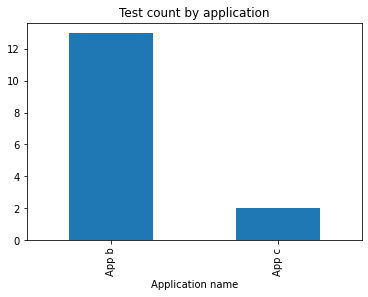

In [39]:
file.application.value_counts().plot(kind='bar')
plt.xlabel('Application name')
plt.title('Test count by application')

Text(0.5, 1.0, 'Test count by test type')

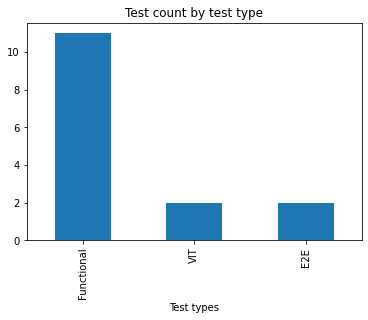

In [6]:
file.test_type.value_counts().plot(kind='bar')
plt.xlabel('Test types')
plt.title('Test count by test type')

Text(0.5, 1.0, 'Automation Status count')

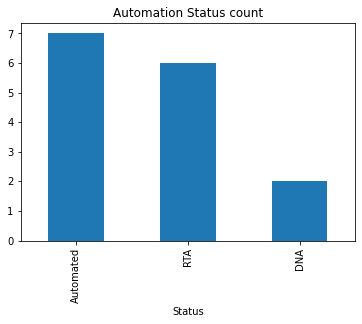

In [40]:
file['automation_status'].value_counts().plot(kind='bar')
plt.xlabel('Status')
plt.title('Automation Status count')

Text(0.5, 1.0, 'Test status percentage')

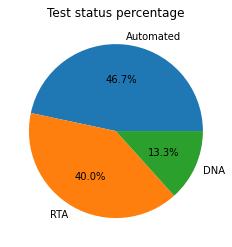

In [51]:
file['automation_status'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Test status percentage')

Text(0.5, 1.0, 'Automation tool usage')

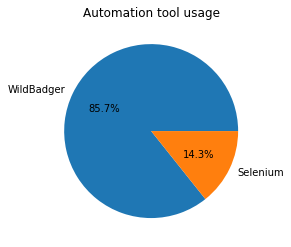

In [4]:
file['automation_tool'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Automation tool usage')

### Spliting files

#### By Test Type

In [52]:
for type in list(dict.fromkeys(file.test_type.tolist())):
    file.loc[file.test_type==type].to_csv(path_or_buf='Splits/Test Types/'+str(type)+'.csv',sep=';', index = False)

#### By Automation tool

In [53]:
for tool in list(dict.fromkeys(file.automation_tool.tolist())):
    file.loc[file.automation_tool==tool].to_csv(path_or_buf='Splits/Automation Tool/'+str(tool)+'.csv',sep=';', index = False)

#### By Automation status

In [51]:
for status in list(dict.fromkeys(file.automation_status.tolist())):
    file.loc[file.automation_status==status].to_csv(path_or_buf='Splits/Automation Status/'+str(status)+'.csv',sep=';', index = False)